# Analysis

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
sns.set(rc={'figure.figsize':(12,8)})

# Linear Regression

In [3]:
pd.options.display.max_rows=None

In [6]:
data = pd.read_csv('train_1.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Codes,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,F,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,E,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,E,2


In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_Codes',
       'Age_Group'],
      dtype='object')

In [11]:
col_to_include = ['Survived','Pclass', 'Sex', 'Age_Group', 'SibSp','Age',  'Embarked','Parch','Fare','Cabin_Codes']
#col_to_include = ['Survived','Pclass', 'Sex', 'Age', 'SibSp']
dataset = data.copy()

dataset = dataset[col_to_include]

#dataset = dataset.dropna(subset=['Embarked'])

## Train And test Dataset

In [12]:
y = dataset['Survived']

x = dataset.drop(['Survived'],axis=1)

In [13]:
x.columns.values

array(['Pclass', 'Sex', 'Age_Group', 'SibSp', 'Age', 'Embarked', 'Parch',
       'Fare', 'Cabin_Codes'], dtype=object)

In [14]:
x = pd.get_dummies(x,columns=['Pclass','Sex','Embarked','Cabin_Codes','Age_Group'],drop_first=True)


In [15]:

x.head(100)

,SibSp,Age,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Cabin_Codes_B,Cabin_Codes_C,Cabin_Codes_D,Cabin_Codes_E,Cabin_Codes_F,Cabin_Codes_G,Cabin_Codes_T,Age_Group_2,Age_Group_3,Age_Group_4
0,1,22.00,0,7.2500,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0
1,1,38.00,0,71.2833,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,26.00,0,7.9250,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
3,1,35.00,0,53.1000,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
4,0,35.00,0,8.0500,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0
5,0,24.00,0,8.4583,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0
6,0,54.00,0,51.8625,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
7,3,2.00,1,21.0750,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0
8,0,27.00,2,11.1333,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
9,1,14.00,0,30.0708,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =32,shuffle=True)

x_train.shape,x_test.shape


print('Test Shape : {} , Train Shape {}'.format(x_test.shape,x_train.shape))

Test Shape : (179, 19) , Train Shape (712, 19)


# Modelling

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [19]:
model = LogisticRegression()
res = model.fit(x_train,y_train)
print('Train Accuracy:', accuracy_score(y_train,res.predict(x_train)))
print('Test Accuracy:', accuracy_score(y_test,res.predict(x_test)))

Train Accuracy: 0.824438202247191
Test Accuracy: 0.8100558659217877


C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Create Submission

In [40]:
test_data = pd.read_csv('test_1.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Codes,Age_Group
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,B,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,B,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,B,4
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,B,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,B,2


In [41]:
passenger_id = test_data.PassengerId

In [42]:
tes_col_to_include = col_to_include[1:]

In [43]:
test_data = test_data[tes_col_to_include]

In [44]:
test_data = pd.get_dummies(test_data,columns=['Pclass','Sex','Embarked','Cabin_Codes','Age_Group'],drop_first=True)
test_data.head()

,SibSp,Age,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Cabin_Codes_B,Cabin_Codes_C,Cabin_Codes_D,Cabin_Codes_E,Cabin_Codes_F,Cabin_Codes_G,Age_Group_2,Age_Group_3,Age_Group_4
0,0,34.5,0,7.8292,0,1,1,1,0,1,0,0,0,0,0,1,0,0
1,1,47.0,0,7.0000,0,1,0,0,1,1,0,0,0,0,0,0,1,0
2,0,62.0,0,9.6875,1,0,1,1,0,1,0,0,0,0,0,0,0,1
3,0,27.0,0,8.6625,0,1,1,0,1,1,0,0,0,0,0,1,0,0
4,1,22.0,1,12.2875,0,1,0,0,1,1,0,0,0,0,0,1,0,0


In [45]:
model = LogisticRegression()
res = model.fit(x,y)
print('Train Accuracy:', accuracy_score(y_train,res.predict(x_train)))

Train Accuracy: 0.8202247191011236


C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [48]:
test_data['Cabin_Codes_T'] = 0


In [49]:
pred_values = res.predict(test_data)

In [50]:
result = pd.DataFrame({
                        'PassengerId': passenger_id,
                        'Survived':pred_values
                        })
result = result.sort_values(by='PassengerId')

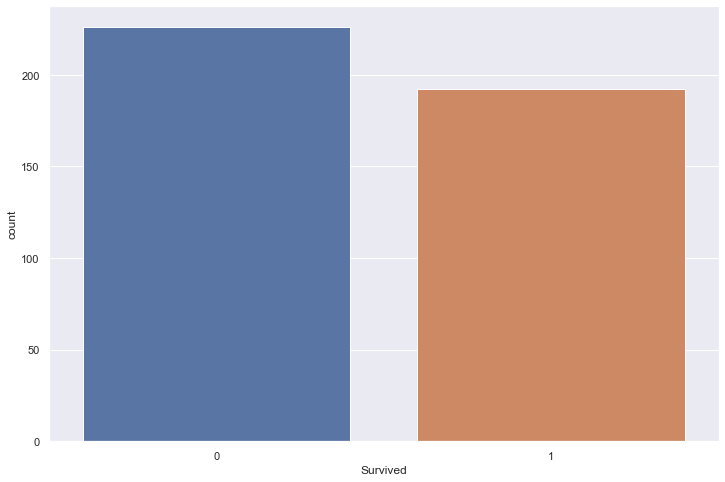

In [51]:
sns.countplot(result['Survived'])

In [52]:
result.shape

(418, 2)

In [53]:
result.to_csv('Prediction_6.csv',index=False)